$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression

Shashank Satyanarayana

## Overview

The objective of this assignment is to understand the basics of Data Analysis for Machine Learning. Initially, we perform certain basic mathematical functions on given random data to obtain mean, standard deviation, weights and rmse (root mean squared error). Then we establish a linear model and predict the output for a given input. Finally we learn about Linear Regression and additionally perform Linear Regression using Stochastic Gradient Descent (SGD). The above mentioned process is repeated using [Appliances energy prediction Data Set ](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) from the UCI Machine Learning Repository.

## Method

The following functions are defined for this experiment:

  * ```model = train(X, T)```
  * ```predict = use(model, X)```
  * ```error = rmse(predict, T)```
  
Let ```X``` be a two-dimensional matrix (```np.array```) with each row containing one data sample, and ```T``` be a two-dimensional matrix of one column containing the target values for each sample in ```X```.  So, ```X.shape[0]``` is equal to ```T.shape[0]```.   

Function ```train``` will standardize the input data in ```X``` and return a dictionary with  keys named ```means```, ```stds```, and ```w```.  

Function ```use``` will also standardize its input data X by using the means and standard deviations in the dictionary returned by ```train```.

Function ```rmse``` returns the square root of the mean of the squared error between ```predict``` and ```T```.

Additionally, we define the following function: 
   * ```model = trainSGD(X, T, learningRate, numberOfIterations)```

which performs the incremental training process described in class as stochastic gradient descent (SGC).  The result of this function is a dictionary with the same keys as the dictionary returned by the above ```train``` function.

## Examples

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output
import time

In [2]:
X = np.arange(10).reshape((5,2))
T = X[:,0:1] + 2 * X[:,1:2] + np.random.uniform(-1, 1,(5, 1))
print('Inputs')
print(X)
print('Targets')
print(T)

Inputs
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Targets
[[  1.74793331]
 [  8.80069697]
 [ 13.81623604]
 [ 19.43824464]
 [ 25.15610799]]


In [3]:
def train(X,T):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    Xs = (X-means)/stds        #Standardized value of X
    Xs1= np.hstack((np.ones((Xs.shape[0],1)),Xs))  #Adding a column of one's to Xs to form matrix Xs1
    w = np.linalg.lstsq(np.dot(Xs1.T,Xs1),np.dot(Xs1.T,T))[0] #lstsq returns additional information and only the weights are required
    model = {'means':means,'stds':stds,'w':w}
    return model
    
def use(model,X):  
    means = model['means']
    stds = model['stds']
    w = model['w']    
    Xs = (X-means)/stds
    Xs1 =np.hstack((np.ones((Xs.shape[0],1)),Xs))
    predict = np.dot(Xs1,w)
    return predict
    
def rmse(predict,T):
    return sqrt(mean_squared_error(predict, T))
    

In [4]:
model = train(X, T)
model

{'means': array([ 4.,  5.]),
 'stds': array([ 2.82842712,  2.82842712]),
 'w': array([[ 13.79184379],
        [  4.06260402],
        [  4.06260402]])}

In [5]:
predicted = use(model, X)
predicted

array([[  2.30106438],
       [  8.04645409],
       [ 13.79184379],
       [ 19.5372335 ],
       [ 25.2826232 ]])

In [6]:
rmse(predicted, T)

0.42455534162881636

In [7]:
def trainSGD(X, T, learningRate, numberOfIterations, stepsPerFrame=10):

    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    Xs = (X-means)/stds   
    X1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    
    w = np.zeros((X.shape[1]+1,T.shape[1]))
    ws = [w.copy()]
    
    for iter in range(numberOfIterations):
        for n in range(X.shape[0]):
            predicted = X1[n:n+1,:] @ w  # n:n+1 is used instead of n to preserve the 2-dimensional matrix structure
            # Update w using negative derivative of error for nth sample
            w += learningRate * X1[n:n+1, :].T * (T[n:n+1, :] - predicted)
            ws.append(w.copy())

    model = {'means':means,'stds':stds,'w':w}
    return model

In [8]:
modelSGD = trainSGD(X, T, 0.01, 100)
modelSGD

{'means': array([ 4.,  5.]),
 'stds': array([ 2.82842712,  2.82842712]),
 'w': array([[ 13.70612269],
        [  4.06034369],
        [  4.06034369]])}

In [9]:
predicted = use(modelSGD, X)
predicted

array([[  2.22173646],
       [  7.96392958],
       [ 13.70612269],
       [ 19.4483158 ],
       [ 25.19050891]])

In [10]:
rmse(predicted, T)

0.433146374839283

## Data

The data was downloaded ```energydata_complete.csv``` from the [Appliances energy prediction Data Set ](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) at the UCI Machine Learning Repository. 

This dataset consists of 29 different attributes that were recorded at an interval of 10 mins in a particualr building over a period of 4.5 months accounting to  a total of 19735 samples.The sample attributes are as follows:
- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional 

The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 

For this experiment, we ignore the first column (date and time), use the next two columns as target variables, and use all but the last two columns (named rv1 and rv2) as input variables. 

In [11]:
def loadData(filename):
    f = open(filename,"r")
    header = f.readline()
    names = header.replace('"','').split(',')[1:27]
    data = np.array(list(csv.reader(f)))
    data=data[:(data.shape[0]),1:(data.shape[1]-2)]
    Xenergy=data[:,2:].astype(float)
    Xnames =header.replace('"','').split(',')[3:27]
    Tenergy=data[:,:2].astype(float)
    Tnames = header.replace('"','').split(',')[1:3]
    data=data.astype(np.float)
    return names,data, Xenergy, Xnames, Tenergy, Tnames

In [12]:
names,data,Xenergy,Xnames,Tenergy,Tnames=loadData('energydata_complete.csv')

In [13]:
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [14]:
Xnames 

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [15]:
Tnames

['Appliances', 'lights']

In [16]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

### Plot of Appliance v/s Input Variables
This plot shows that the input data with respect to Appliances is not Linear

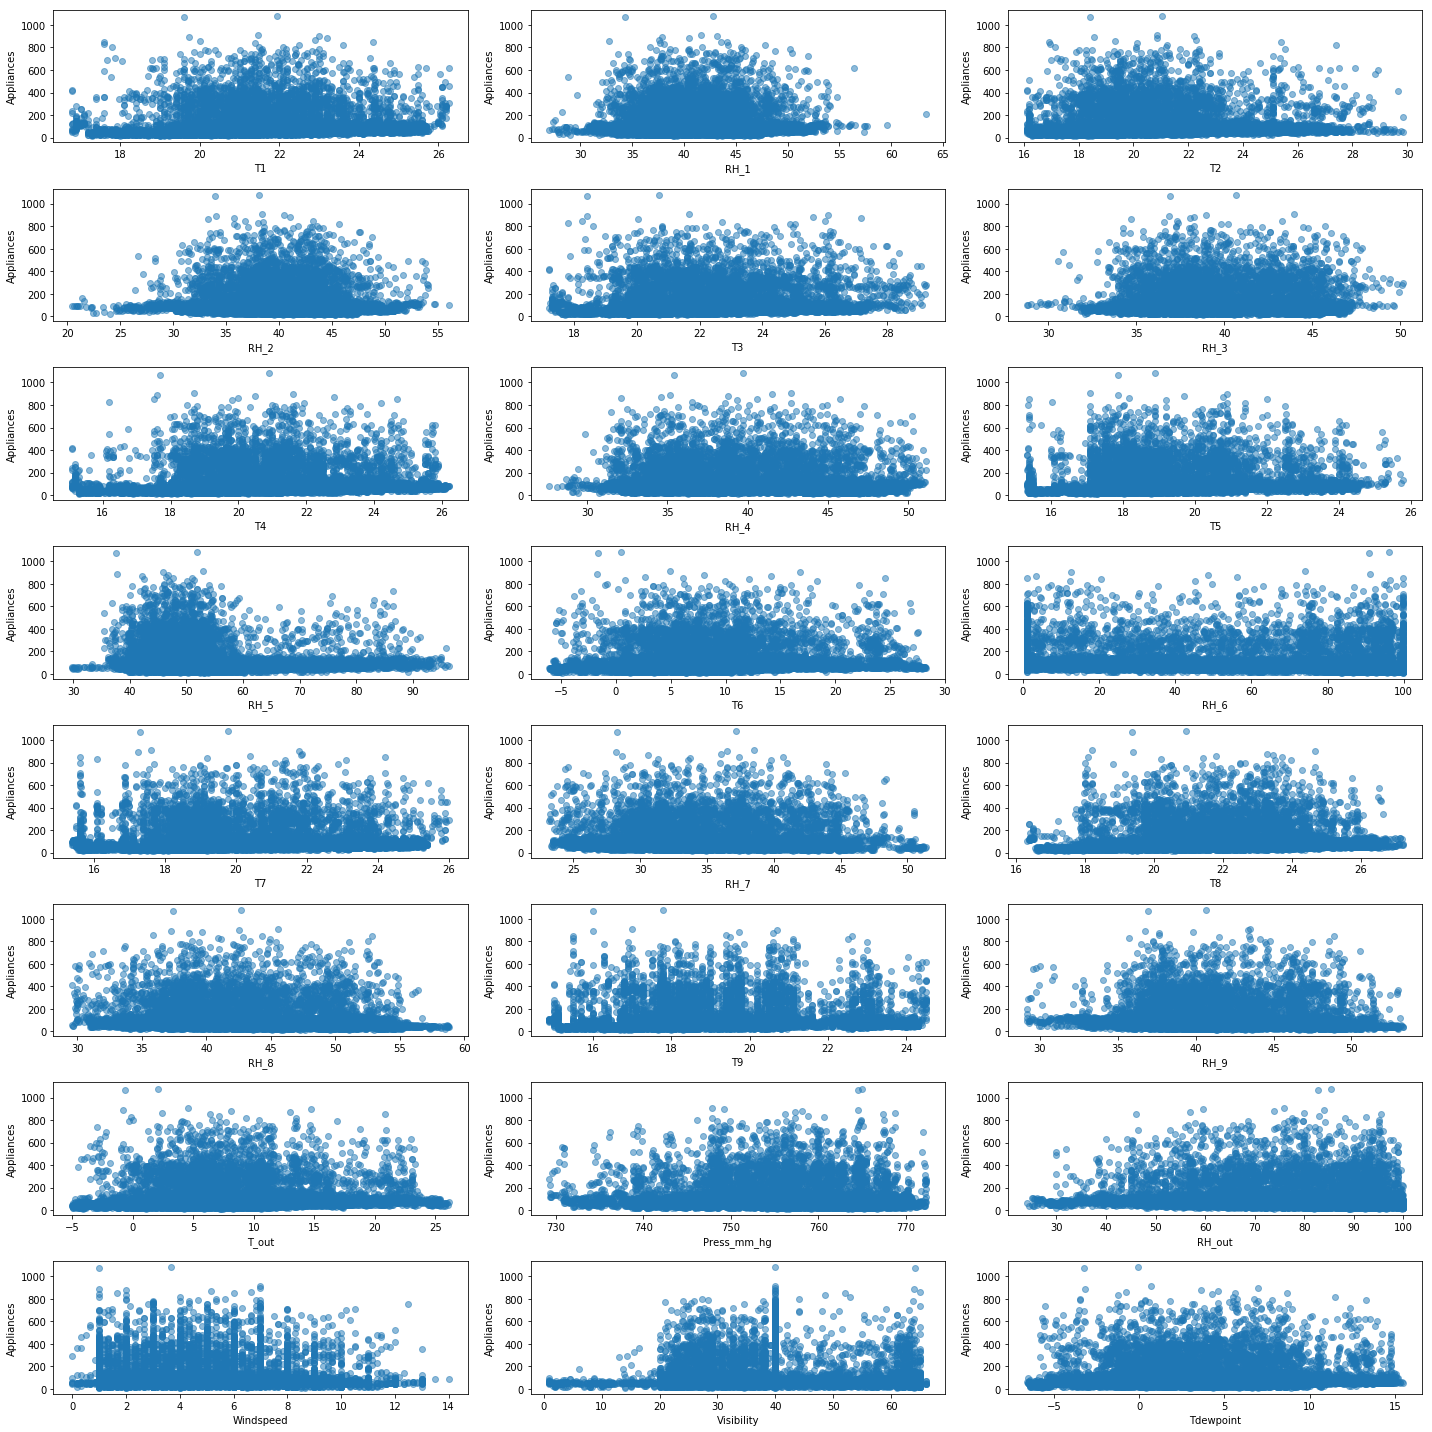

In [17]:
plt.figure(figsize=(20,20))
for c in range (Xenergy.shape[1]):
    plt.subplot(8,3,c+1)
    plt.plot(Xenergy[:, c], Tenergy[:,0], 'o', alpha=0.5)
    plt.ylabel(Tnames[0])
    plt.xlabel(Xnames[c]) 
plt.tight_layout()

### Plot of Lights v/s Input Variables
This plot shows that the input data with respect to Lights(energy usage of light fixtures) is not Linear

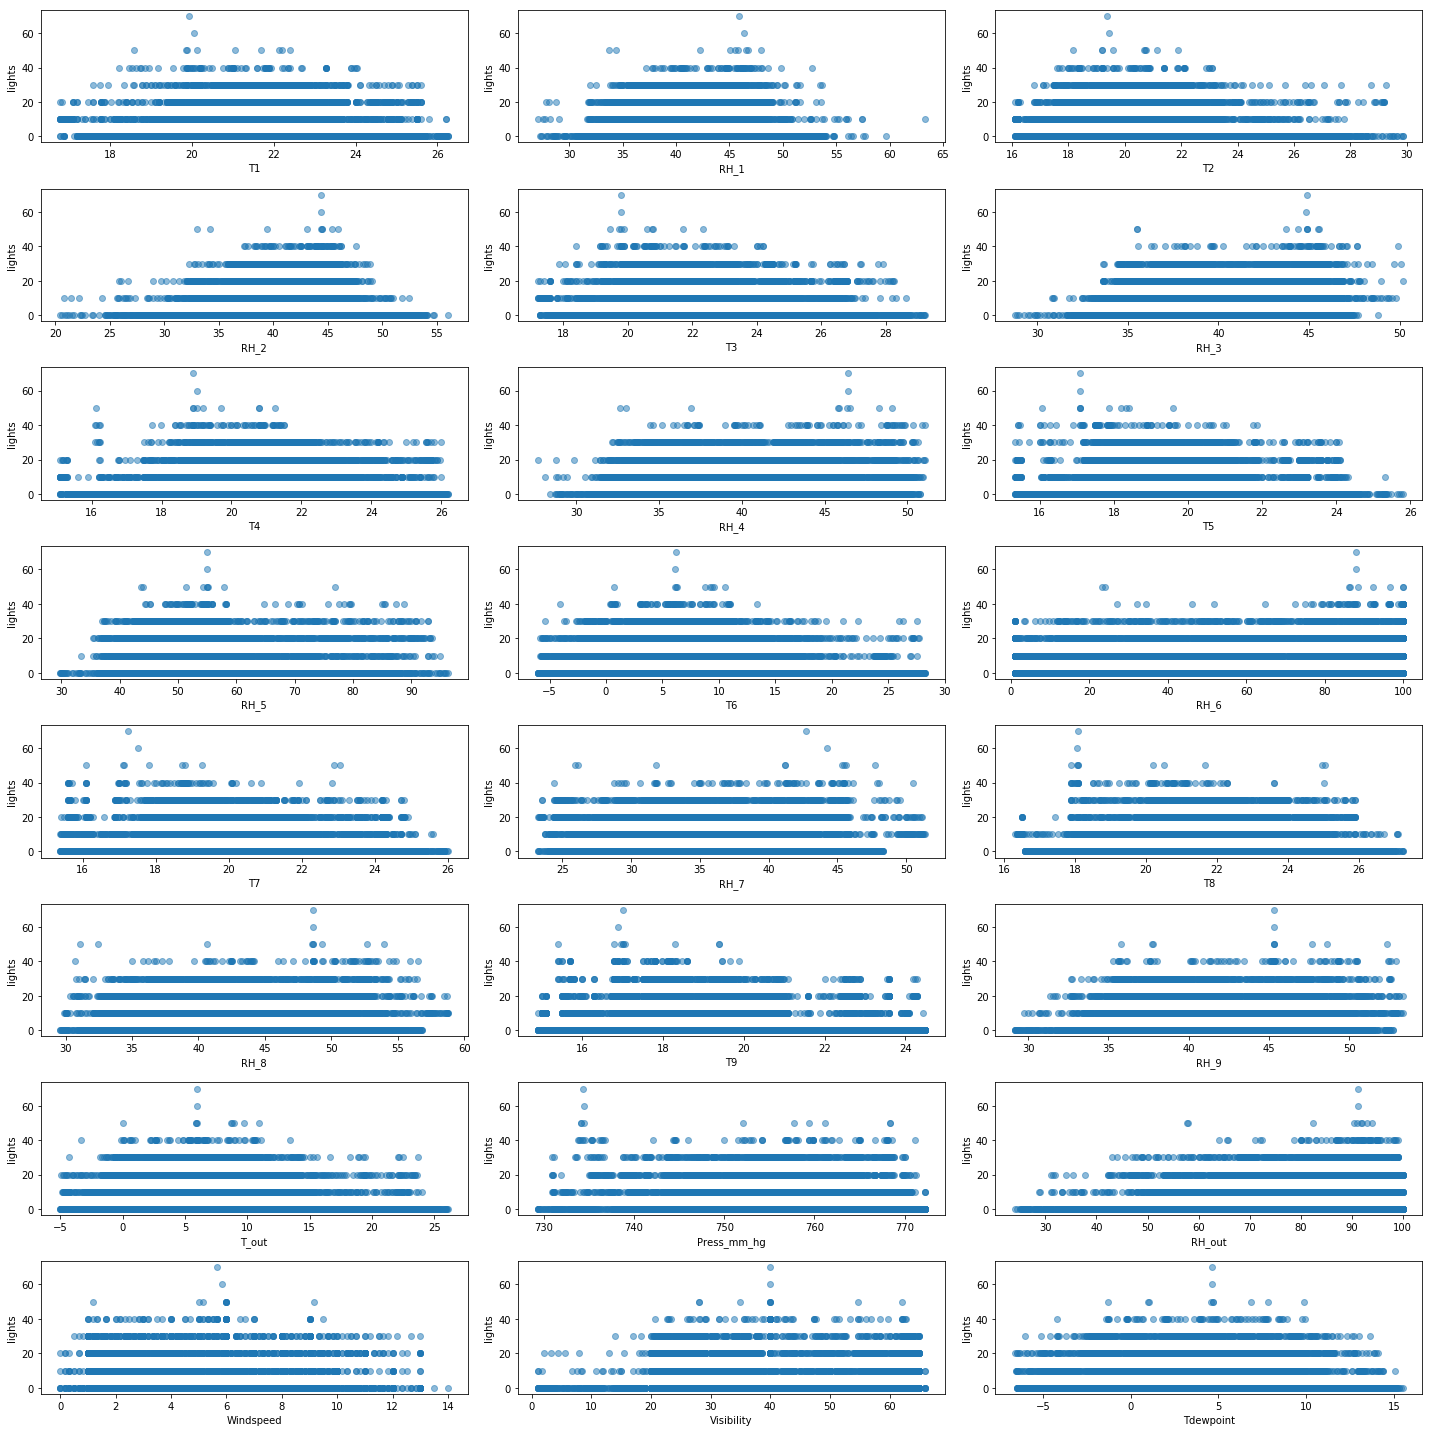

In [18]:
plt.figure(figsize=(20,20))
for c in range (Xenergy.shape[1]):
    plt.subplot(8,3,c+1)
    plt.plot(Xenergy[:, c], Tenergy[:,1], 'o', alpha=0.5)
    plt.ylabel(Tnames[1])
    plt.xlabel(Xnames[c]) 
plt.tight_layout()

## Results

In this section we will discuss the results of the applying Linear Regression to the given Appliance Energy Dataset. The following cases are considered:
- *Case 1:* Applying the functions to the dataset.  Comparing the error obtained as a result of both training functions.  Experiment with different learning rates for ```trainSGD``` and discuss the errors.

- *Case 2:* Make some plots of the predicted energy uses and the actual energy uses versus the sample index.  Also plot predicted energy use versus actual energy use.  Show the above plots for the appliances energy use and repeat them for the lights energy use. Discuss the observations of each graph.

- *Case 3:* Show the values of the resulting weights and discuss which ones might be least relevant for fitting the linear model.  Remove them, fit the linear model again, plot the results, and discuss of the final results obtained.

### Case 1:
- It may be obeserved that the RMSE for the normal train function is significantly lower than the RMSE of the ```trainSGD``` function. This may be justified by the fact that the data is not linearly distributed and application of a Linear regression to a non-linear data may not yield optimum results.

- *Learning Rate:* With a constant Number of Iterations, it may be observed that decreasing the learning rate (increased learning) will decrease the RMSE and have a positive impact on the Linear Regressino Model.

- *Number of Iterations:* With a constant Learning Rate, it may be observed that the Number Of Iterations will have little to no imapact on the Linear Regression model 

- *Computation Time:* It may be noted that higher learning rate and large number of iterations correspond to increased computation time

In [19]:
linearModel=train(Xenergy,Tenergy)

In [20]:
predicted=use(linearModel,Xenergy)

In [21]:
error=rmse(predicted,Tenergy)
error

67.16000985310122

In [22]:
start=time.time()
modelSGD=trainSGD(Xenergy,Tenergy,0.01,100)
end=time.time()
predictedSGD=use(modelSGD,Xenergy)
errorSGD=rmse(predictedSGD,Tenergy)
print('RMSE:{}, Time:{}'.format(errorSGD,end-start))

RMSE:177.07807978877608, Time:15.637698650360107


In [23]:
start=time.time()
modelSGD=trainSGD(Xenergy,Tenergy,0.001,100)
end=time.time()
predictedSGD=use(modelSGD,Xenergy)
errorSGD=rmse(predictedSGD,Tenergy)
print('RMSE:{}, Time:{}'.format(errorSGD,end-start))

RMSE:78.5558305550601, Time:15.055341243743896


In [24]:
start=time.time()
modelSGD=trainSGD(Xenergy,Tenergy,0.0001,100)
end=time.time()
predictedSGD=use(modelSGD,Xenergy)
errorSGD=rmse(predictedSGD,Tenergy)
print('RMSE:{}, Time:{}'.format(errorSGD,end-start))

RMSE:67.65826109459755, Time:14.297089099884033


In [25]:
start=time.time()
modelSGD=trainSGD(Xenergy,Tenergy,0.001,100)
end=time.time()
predictedSGD=use(modelSGD,Xenergy)
errorSGD=rmse(predictedSGD,Tenergy)
print('RMSE:{}, Time:{}'.format(errorSGD,end-start))

RMSE:78.5558305550601, Time:18.31685781478882


In [26]:
start=time.time()
modelSGD=trainSGD(Xenergy,Tenergy,0.001,200)
end=time.time()
predictedSGD=use(modelSGD,Xenergy)
errorSGD=rmse(predictedSGD,Tenergy)
print('RMSE:{}, Time:{}'.format(errorSGD,end-start))

RMSE:78.58140390159215, Time:34.70281910896301


In [27]:
start=time.time()
modelSGD=trainSGD(Xenergy,Tenergy,0.001,500)
end=time.time()
predictedSGD=use(modelSGD,Xenergy)
errorSGD=rmse(predictedSGD,Tenergy)
print('RMSE:{}, Time:{}'.format(errorSGD,end-start))

RMSE:78.58286272523782, Time:92.62609434127808


### Case 2:
It may be observed that the graph of Predicted v/s Actual has large number of outliers indicating that the Linear Regression model is not very accurate. This may be substantiated by the fact that we are trying to fit a non-inear data using a Linear Regression Model. 

Additionally, it may be noted that the RMSE for predicting Appliances is much larger than the RMSE for predicting Lights. This maybe due to the fact that Appliances have a greater range of values than Lights

In [28]:
for n, mn, mx in zip(Tnames, np.min(Tenergy, axis=0), np.max(Tenergy, axis=0)):
    print('{:>20} {:8.2f} {:8.2f}'.format(n, mn, mx))

          Appliances    10.00  1080.00
              lights     0.00    70.00


In [29]:
modelSGD=trainSGD(Xenergy,Tenergy,0.0001,100)
predictedSGD=use(modelSGD,Xenergy)
errorSGD=rmse(predictedSGD,Tenergy)
error1=rmse(predictedSGD[:,0],Tenergy[:,0])
error2=rmse(predictedSGD[:,1],Tenergy[:,1])
print('Average RMSE of Data:{} \n RMSE for Predicting {}:{} \n RMSE for Predicting {}:{}'.format(errorSGD,Tnames[0],error1,Tnames[1],error2))

Average RMSE of Data:67.65826109459755 
 RMSE for Predicting Appliances:95.42123304331223 
 RMSE for Predicting lights:7.075936205433127


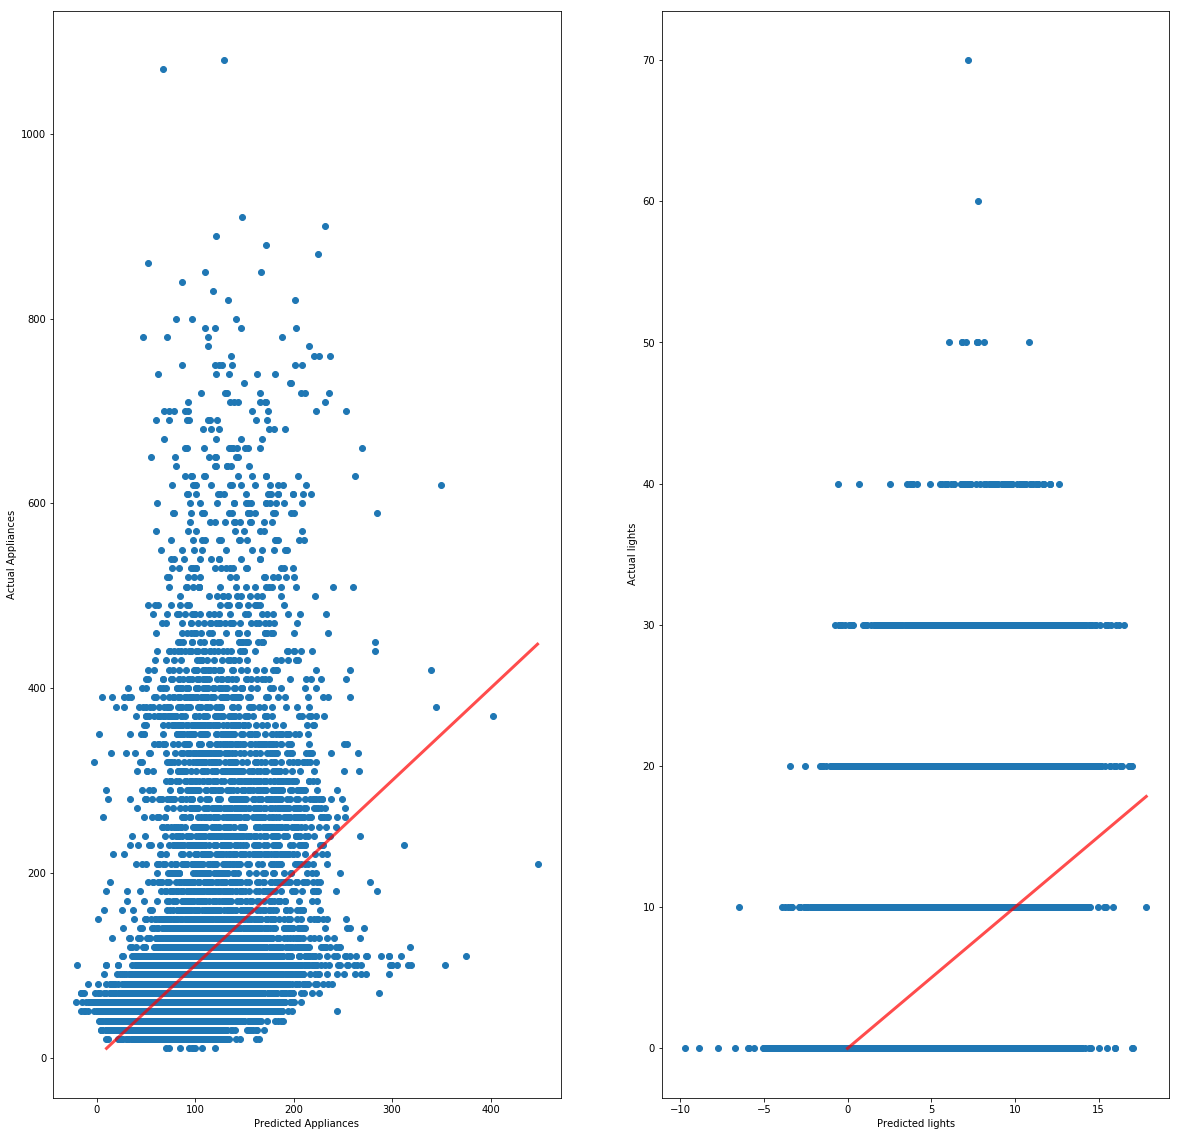

In [30]:
plt.figure(figsize=(20,20))
for i in range (Tenergy.shape[1]):
    plt.subplot(1,2,i+1)
    plt.plot(predictedSGD[:,i], Tenergy[:,i], 'o')
    plt.xlabel('Predicted {}'.format(Tnames[i]))
    plt.ylabel('Actual {}' .format(Tnames[i]))
    # add a 45 degree line
    a = max(min(predictedSGD[:,i]), min(Tenergy[:,i]))
    b = min(max(predictedSGD[:,i]), max(Tenergy[:,i]))
    plt.plot([a, b], [a ,b], 'r', linewidth=3, alpha=0.7);

### Case 3: Analysis of training weights

In [31]:
for wi, name in zip(modelSGD['means'].flat, Xnames):
    print('{:8.3f}  {:s}'.format(wi, name))

  21.687  T1
  40.260  RH_1
  20.341  T2
  40.420  RH_2
  22.268  T3
  39.243  RH_3
  20.855  T4
  39.027  RH_4
  19.592  T5
  50.949  RH_5
   7.911  T6
  54.609  RH_6
  20.267  T7
  35.388  RH_7
  22.029  T8
  42.936  RH_8
  19.486  T9
  41.552  RH_9
   7.412  T_out
 755.523  Press_mm_hg
  79.750  RH_out
   4.040  Windspeed
  38.331  Visibility
   3.761  Tdewpoint


In [32]:
for n, mn, mx in zip(Xnames, np.min(Xenergy, axis=0), np.max(Xenergy, axis=0)):
    print('{:>20} {:8.2f} {:8.2f}'.format(n, mn, mx))

                  T1    16.79    26.26
                RH_1    27.02    63.36
                  T2    16.10    29.86
                RH_2    20.46    56.03
                  T3    17.20    29.24
                RH_3    28.77    50.16
                  T4    15.10    26.20
                RH_4    27.66    51.09
                  T5    15.33    25.80
                RH_5    29.82    96.32
                  T6    -6.07    28.29
                RH_6     1.00    99.90
                  T7    15.39    26.00
                RH_7    23.20    51.40
                  T8    16.31    27.23
                RH_8    29.60    58.78
                  T9    14.89    24.50
                RH_9    29.17    53.33
               T_out    -5.00    26.10
         Press_mm_hg   729.30   772.30
              RH_out    24.00   100.00
           Windspeed     0.00    14.00
          Visibility     1.00    66.00
           Tdewpoint    -6.60    15.50


Analysis of training weights:
- *Pressure:* Since pressure at a place is nearly a constant coupled with the small range in the variation of Pressure, it maybe noted that pressure has the highest training weights.

Tdewpoint (Outside Dew), Windspeed, T_out (Outside Temperature) and T6 (Temperature to the North) have the lowest weights assigned. Logically, the Outside Dew, Windspeed and temperature to the north of the building will not effect the energy consumption as much. However, it may be noted that the Outside temperature will definitely have an impact on the Energy Consumption of the building. 

Hence for this section of the experiment, we remove the follwing variables from the input data:
- Tdewpoint (Outside Dew)
- Windspeed, T_out (Outside Temperature)
- T6 (Temperature to the North)
make an attempt to fit the linear model again, plot the results, and discuss the final results.

In [33]:
XenergyNew=np.delete(Xenergy,[10,21,23],1) # Delete T6, Windspeed, Tdewpoint data
XnamesNew=np.delete(Xnames,[10,21,23],0) # Delete T6, Windspeed, Tdewpoint attribute names

In [34]:
XenergyNew.shape, XnamesNew.shape

((19735, 21), (21,))

In [35]:
linearModel=train(XenergyNew,Tenergy)
predicted=use(linearModel,XenergyNew)
error=rmse(predicted,Tenergy)
error

67.49158271607945

In [36]:
start=time.time()
modelSGD=trainSGD(XenergyNew,Tenergy,0.0001,100)
end=time.time()
predictedSGD=use(modelSGD,XenergyNew)
errorSGD=rmse(predictedSGD,Tenergy)
error1=rmse(predictedSGD[:,0],Tenergy[:,0])
error2=rmse(predictedSGD[:,1],Tenergy[:,1])
print('Average RMSE of Data:{} \n RMSE for Predicting {}:{} \n RMSE for Predicting {}:{} \n Time:{}'.format(errorSGD,Tnames[0],error1,Tnames[1],error2,end-start))

Average RMSE of Data:67.86934780828534 
 RMSE for Predicting Appliances:95.71957344406421 
 RMSE for Predicting lights:7.089428998899348 
 Time:15.101414680480957


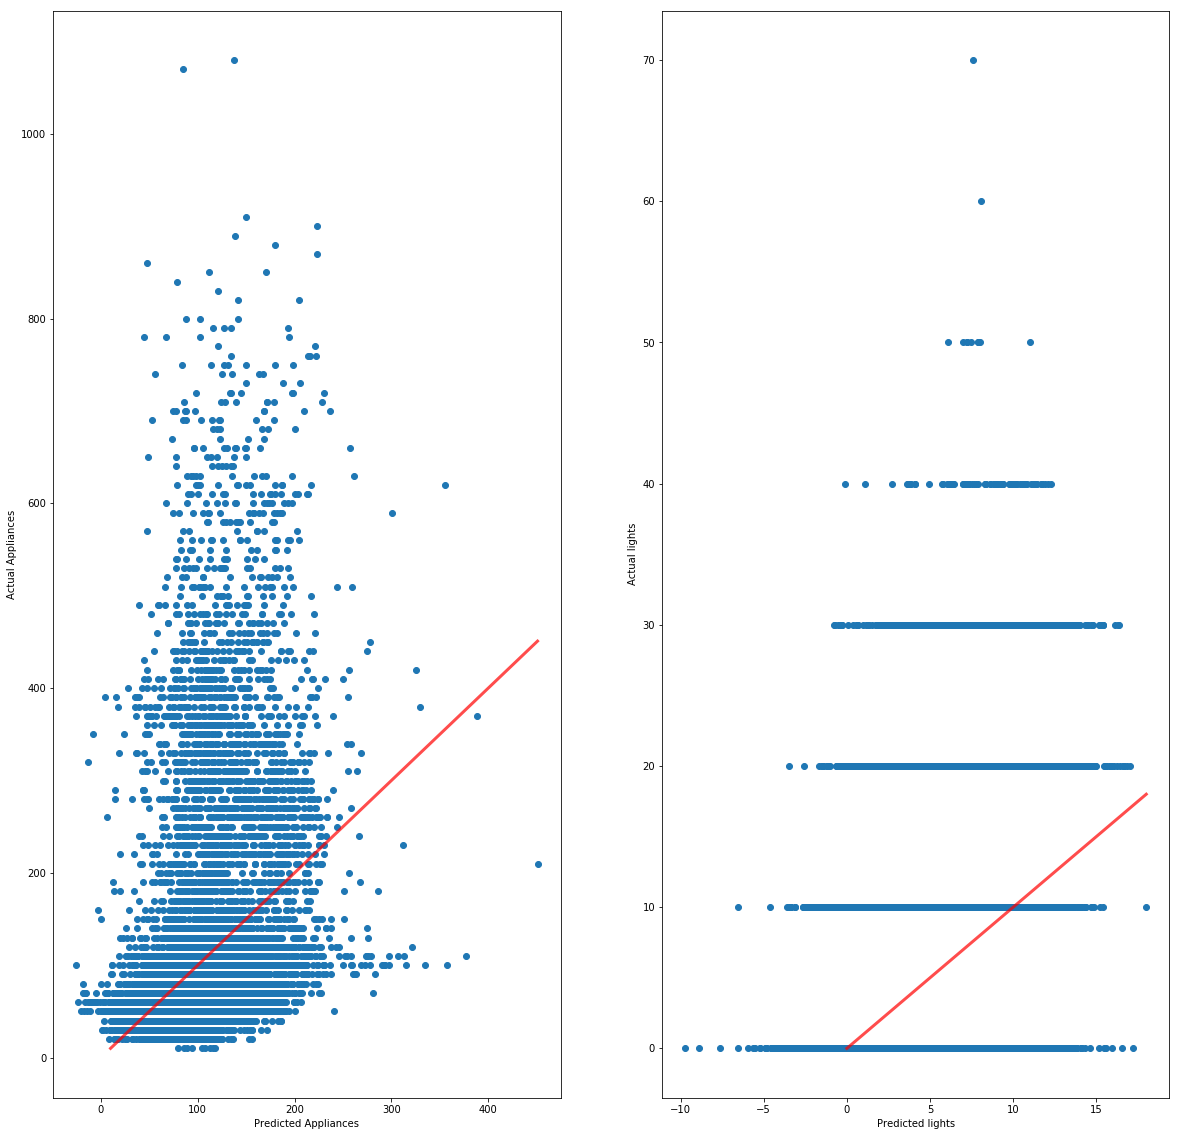

In [37]:
plt.figure(figsize=(20,20))
for i in range (Tenergy.shape[1]):
    plt.subplot(1,2,i+1)
    plt.plot(predictedSGD[:,i], Tenergy[:,i], 'o')
    plt.xlabel('Predicted {}'.format(Tnames[i]))
    plt.ylabel('Actual {}' .format(Tnames[i]))
    # add a 45 degree line
    a = max(min(predictedSGD[:,i]), min(Tenergy[:,i]))
    b = min(max(predictedSGD[:,i]), max(Tenergy[:,i]))
    plt.plot([a, b], [a ,b], 'r', linewidth=3, alpha=0.7);

Analysis: 
The following observations may be made from the above experiments:
- *Computation Time:* Intuitively, lesser number of input samples correspond to faster computation times.
- *Exclusion of Low Weight Samples:* Although there was a significant decrease in the RMSE value, the deletion of lower weight samples did not have any considerable effect on the Linear Regression Model since the complete data by itself is Non-Linear. 
- *Graph of Actual v/s Predicted Value:* There was significant decrease in the number of outliers when compared to `Case 2`

## Grading

In [38]:
%run -i "A1grader.py"


======================= Code Execution =======================

Extracting python code from notebook and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.
Testing rmse(A, B) with
 A =
[[1 2 3]
 [4 5 6]]
 and B =
[[2 3 4]
 [5 6 7]]

--- 10/10 points. Correctly returned 1.0

Testing model = train(X, T) with
 X=
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [18 20 22]
 [24 26 28]]
 and T=
[[  0.2   1.2]
 [  5.    6. ]
 [ 11.6  12.6]
 [ 62.   64. ]
 [ 96.8  98.8]]

--- 5/5 points. Model correctly includes a key named 'means'.

--- 5/5 points. Model correctly includes a key named 'stds'.

--- 5/5 points. Model correctly includes a key named 'w'.

Testing rmse(T, use(model, X))

--- 15/15 points. Error is correctly calculated as 5.2427092232928585.

Testing model = trainSGD(X, T, 0.01, 1000) with
 X=
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [18 20 22]
 [24 26 28]]
 and T=
[[  0.2   1.2]
 [  5.    6. ]
 [ 11.6  12.6]
 [ 62.   64. ]
 [ 96.8  98.8]